# LeNet on MNIST

This is LeNet (6c-16c-120-84) on MNIST. Adam algorithm (lr=0.001) with 100 epoches.


#### LeNet

    Total params: 44,426
    Trainable params: 44,426
    Non-trainable params: 0


####  LeNet with 10 intrinsic dim

    Total params: 488,696
    Trainable params: 10
    Non-trainable params: 488,686
    
#### LeNet with 20000 intrinsic dim    
    Total params: 888,584,426
    Trainable params: 20,000
    Non-trainable params: 888,564,426  

In [1]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
""" Extract final stats from resman's diary file"""
def extract_num(lines0, no_reg=False):

    if no_reg:
        valid_loss_str     = lines0[-5]
        valid_accuracy_str = lines0[-6]
        train_loss_str     = lines0[-8]
        train_accuracy_str = lines0[-9]
        average_time_str   = lines0[-10]        
        run_time_str       = lines0[-11]   
        
    else: 
        valid_loss_str     = lines0[-6]
        valid_accuracy_str = lines0[-7]
        train_loss_str     = lines0[-10]
        train_accuracy_str = lines0[-11]
        average_time_str   = lines0[-12]        
        run_time_str       = lines0[-13]


    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time


""" Extract number of total parameters for each net config from resman's diary file"""
import locale
def parse_num_params(lines0):
    line_str = ''.join(lines0)
    idx = line_str.find("Trainable params: ") # 19 for "Trainable params: "
    param_str = line_str[idx+18:idx+18+10] # 14 is the length of string "Total params: "

    param_num = param_str.split("\n")[0].replace(',','')
    # print param_num
    return int(param_num)

In [8]:
results_dir = '../results/lenet_mnist2'

# dim = [10,50,100,500,1000,2000,5000,10000,15000,20000]
# dim = [0,100,300,350,375,380,390,400,410,420,425,450,475,500,550,600,1000]
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)
            
dim_ = []            
for f in diary_names: 
    if 'dir' not in f:
        dim_.append( int(f.split('_')[-1].split('/')[0]) )         
    
dim = sorted(dim_) 

dim = np.array(dim) 
print dim

diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if '_'+str(d)+'/' in f:
            # print "%d is in" % d + f
            diary_names_ordered.append(f)
        if '_dir/' in f:
            diary_names_dir = f            
 

# extrinsic update  method
with open(diary_names_dir,'r') as ff:
    lines0 = ff.readlines()
    R_dir = extract_num(lines0, True)

print "Baseline LeNet has trainable params:\n" + str(parse_num_params(lines0)) + "\n"
print "Baseline LeNet:\n" + str(R_dir) + "\n"


# intrinsic update method
trainable_param, Rs, Acc= [], [], []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        d = int(fname.split('_')[-1].split('/')[0]) 
        # print d
        
        params = parse_num_params(lines0)
        trainable_param.append(params)
        if d < 1001:
            R = extract_num(lines0, True)
        else:    
            R = extract_num(lines0, False)
        Acc.append(R[1])    
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
                            
Rs = np.array(Rs)
Acc = np.array(Acc)   

# 2.2 construct acc_solved_all and dim_solved_all           
test_acc_bl = R_dir[1]
print test_acc_bl*0.9
for id_d in range(len(dim)):
    d = dim[id_d]
    r = Rs[id_d,1]

    test_acc = r
    if test_acc>test_acc_bl*0.9:
        acc_solved=test_acc
        dim_solved=d
        print "Intrinsic dim is: " + str(d) + " for LeNet"
        # print "\n"
        break



[  100   200   225   250   260   275   290   300   310   325   350   375
   380   390   400   410   420   425   450   475   500   550   600  1000
  1100  1200  1300  1400  1500  2000  2500  3000  3500  4000  4500  5000
 10000 20000 30000 40000 44426]
Baseline LeNet has trainable params:
44426

Baseline LeNet:
(0.11051, 0.9902, 0.00256185, 0.99934, 39100.0)

100 dim:
(0.755928, 0.7543, 0.793199, 0.74802, 39100.0)

200 dim:
(0.398203, 0.8771, 0.426353, 0.86956, 39100.0)

225 dim:
(0.375239, 0.8909, 0.388398, 0.88282, 39100.0)

250 dim:
(0.343939, 0.8977, 0.371627, 0.88504, 39100.0)

260 dim:
(0.325455, 0.9018, 0.34523, 0.8957, 39100.0)

275 dim:
(0.327639, 0.9004, 0.339514, 0.8958, 39100.0)

290 dim:
(0.314797, 0.9086, 0.333205, 0.89804, 39100.0)

300 dim:
(0.303877, 0.9093, 0.322151, 0.90178, 39100.0)

310 dim:
(0.28405, 0.9141, 0.306001, 0.9068, 39100.0)

325 dim:
(0.276835, 0.9152, 0.295323, 0.91084, 39100.0)

350 dim:
(0.269061, 0.9196, 0.281595, 0.91412, 39100.0)

375 dim:
(0.26253,

In [13]:
print Rs.shape
print len(dim)

print ','.join(['%i' % dim[n] for n in xrange(len(Acc))])


print ','.join(['[%i, %s]' % (dim[n], Acc[n]) for n in xrange(len(Acc))])




(41, 5)
41
100,200,225,250,260,275,290,300,310,325,350,375,380,390,400,410,420,425,450,475,500,550,600,1000,1100,1200,1300,1400,1500,2000,2500,3000,3500,4000,4500,5000,10000,20000,30000,40000,44426
[100, 0.7543],[200, 0.8771],[225, 0.8909],[250, 0.8977],[260, 0.9018],[275, 0.9004],[290, 0.9086],[300, 0.9093],[310, 0.9141],[325, 0.9152],[350, 0.9196],[375, 0.9212],[380, 0.9214],[390, 0.9223],[400, 0.9201],[410, 0.9226],[420, 0.9229],[425, 0.9188],[450, 0.9289],[475, 0.9314],[500, 0.9312],[550, 0.941],[600, 0.9432],[1000, 0.96],[1100, 0.9638],[1200, 0.9645],[1300, 0.9647],[1400, 0.9682],[1500, 0.9687],[2000, 0.9751],[2500, 0.9763],[3000, 0.9805],[3500, 0.98],[4000, 0.9805],[4500, 0.9832],[5000, 0.9826],[10000, 0.986],[20000, 0.9868],[30000, 0.9873],[40000, 0.9864],[44426, 0.9875]


## Performance comparison with Baseline

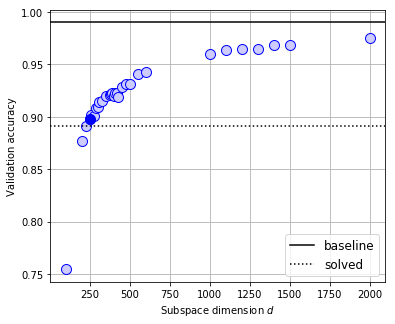

In [5]:
fig, ax = subplots(figsize=(6,5) )
  
font = {'size'   : 12}
matplotlib.rc('font', **font)


plot(dim[:30], Rs[:30,1], 'o', mec='b', mfc=(.8,.8,1), ms=10)
plot(dim_solved, acc_solved, 'o', mec='b', mfc='b', ms=10)
axhline(test_acc_bl, ls='-', color='k',label='baseline')
axhline(test_acc_bl * .9, ls=':', color='k',label='solved')
plt.legend()
ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Validation accuracy')

# ax.set_title('width %d, depth %d' %(width[i], depth[j]))
plt.grid()
# ax.set_ylim([0.3,0.7])
        
fig.savefig("figs/lenet_mnist_dim.pdf", bbox_inches='tight')

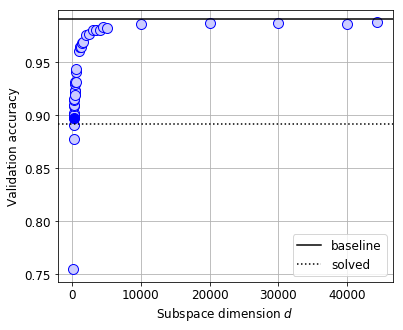

In [6]:
fig, ax = subplots(figsize=(6,5) )
  
font = {'size'   : 12}
matplotlib.rc('font', **font)


plot(dim, Rs[:,1], 'o', mec='b', mfc=(.8,.8,1), ms=10)
plot(dim_solved, acc_solved, 'o', mec='b', mfc='b', ms=10)
axhline(test_acc_bl, ls='-', color='k',label='baseline')
axhline(test_acc_bl * .9, ls=':', color='k',label='solved')
plt.legend()
ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Validation accuracy')

# ax.set_title('width %d, depth %d' %(width[i], depth[j]))
plt.grid()
# ax.set_ylim([0.3,0.7])
        
fig.savefig("figs/lenet_mnist_dim.pdf", bbox_inches='tight')

(0.0, 0.5)

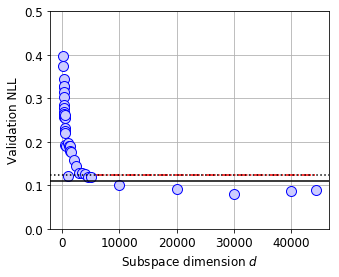

In [7]:
nn = len(Rs)
fig, ax = subplots(figsize=(5,4) )
                  
plt.scatter(dim[1:], Rs[1:,0], edgecolor="k", facecolor="w" )
ax.plot(dim, R_dir[0]*np.ones(nn)/0.9,'r-.', label="Testing: baseline")

plot(dim, Rs[:,0], 'o', mec='b', mfc=(.8,.8,1), ms=10)
axhline(R_dir[0], ls='-', color='k',label='baseline')
axhline(R_dir[0] / .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Validation NLL')
plt.grid()
ax.set_ylim([0.0,0.5])